In [5]:
import pandas as pd
import seaborn
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [6]:
X_train_path = '../data/processed/X_train.csv'
X_test_path = '../data/processed/X_test.csv'
y_train_path = '../data/processed/y_train.csv'
y_test_path = '../data/processed/y_test.csv'

X_train = pd.read_csv(X_train_path)
X_test = pd.read_csv(X_test_path)
y_train = pd.read_csv(y_train_path).squeeze()
y_test = pd.read_csv(y_test_path).squeeze()

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nFeatures:", X_train.columns.tolist())

Training set shape: (121310, 10)
Test set shape: (30328, 10)

Features: ['PartyType_Code', 'Sobriety_Code', 'Age', 'PrimaryCollisionFactor_Code', 'CollisionType_Code', 'VehicleDamage_Code', 'MovementPrecedingCollision_Code', 'ViolationCode', 'CrashTime', 'Distance']


In [7]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.values.ravel())

RandomForestClassifier(random_state=42)

In [8]:
y_pred = rf_model.predict(X_test)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81     16695
           1       0.52      0.56      0.54      8507
           2       0.35      0.25      0.29      3967
           3       0.26      0.11      0.15       896
           4       0.41      0.19      0.26       263

    accuracy                           0.66     30328
   macro avg       0.47      0.39      0.41     30328
weighted avg       0.63      0.66      0.64     30328



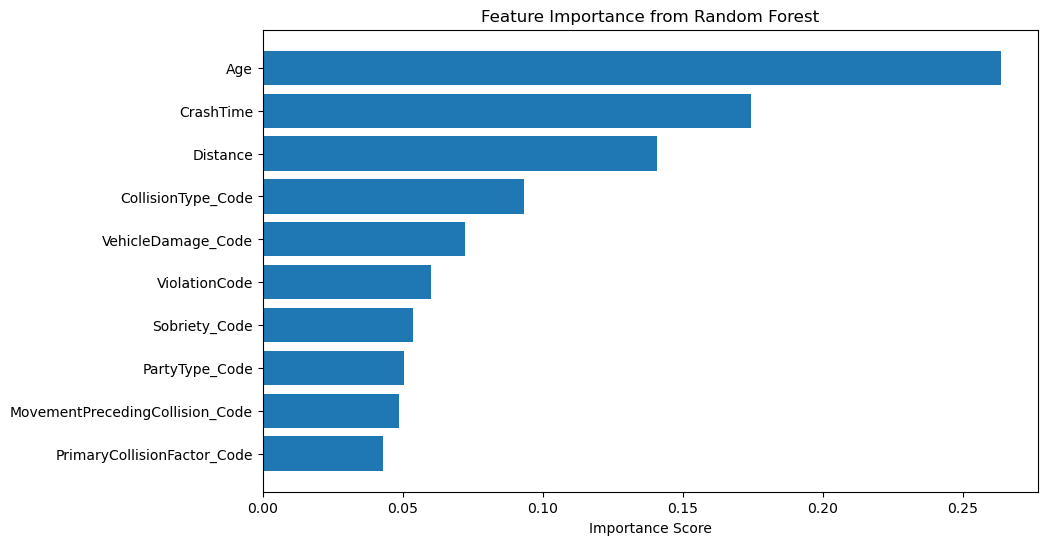

,Feature,Importance
2,Age,0.263465
8,CrashTime,0.174444
9,Distance,0.140871
4,CollisionType_Code,0.093190
5,VehicleDamage_Code,0.072266
7,ViolationCode,0.060218
1,Sobriety_Code,0.053492
0,PartyType_Code,0.050604
6,MovementPrecedingCollision_Code,0.048488
3,PrimaryCollisionFactor_Code,0.042961


In [9]:
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.title('Feature Importance from Random Forest')
plt.show()

# Display the feature importance table
importance_df